UTKFace Dataset 

- Contains **20,000**  
- Labels:  
  - **Age:** 0–116 years  
  - **Gender:** 0 = male, 1 = female  
  - **Ethnicity:** 5 classes (White, Black, Asian, Indian, Others)  
- Format: JPEG, aligned faces 


---
##  Run the code below to download.
If you did not download the dataset, you can download it from the source or download it via the 📖 **Reference:** [Hugging Face](https://huggingface.co/datasets/Subh775/UTKFace_demographics_V1) link.

In [ ]:
%pip install huggingface-hub

In [ ]:
from huggingface_hub import snapshot_download

# Download the full snapshot of the dataset repository from Hugging Face Hub
snapshot_download(
    repo_id="Subh775/UTKFace_demographics_V1",  # The dataset repository ID on Hugging Face
    repo_type="dataset",                        # Specify that the repo type is a dataset
    cache_dir="../dataset/"                     # Local directory where the dataset will be cached
)


C:\Users\LOTUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Fetching 4 files: 100%|██████████| 4/4 [14:38<00:00, 219.56s/it]


'../dataset/datasets--Subh775--UTKFace_demographics_V1\\snapshots\\01fc0ca3fd293962454834c1e19c5266bc427674'

---
## Read dataset

In [ ]:
import pandas as pd

# Base directory where the dataset files are stored
BASE_DIR="../dataset/datasets--Subh775--UTKFace_demographics_V1/snapshots/01fc0ca3fd293962454834c1e19c5266bc427674/data/"  # It may change depending on the directory.

# Read the first parquet shard
df1 = pd.read_parquet(f"{BASE_DIR}train-00000-of-00002.parquet")

# Read the second parquet shard
df2 = pd.read_parquet(f"{BASE_DIR}train-00001-of-00002.parquet")

# Concatenate both shards into a single DataFrame and reset the index
df = pd.concat([df1, df2], ignore_index=True)

# Display the first 5 rows of the combined DataFrame
print(df.head())


                                               image  age  gender  race
0  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...  100       1     0
1  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...  100       1     2
2  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...  100       1     2
3  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...  101       1     2
4  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...   10       0     0


---
##  Create a Small Independent Test Set

Creating test data from the dataset for when our model has achieved full learning for final testing

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
import io

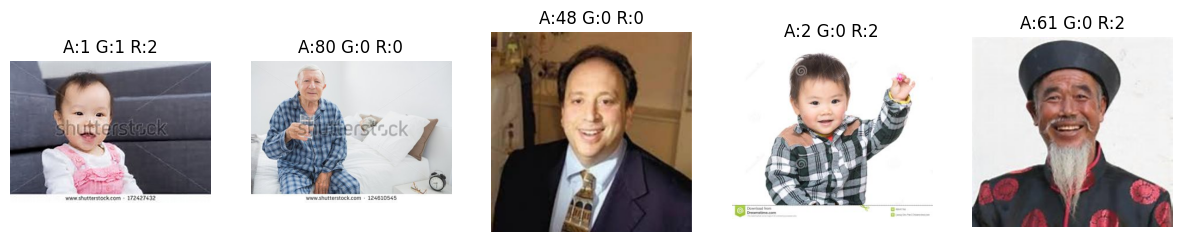

In [ ]:
# Take 5 random samples from the dataframe with a fixed random seed
test_samples = df.sample(n=5, random_state=96)
test_samples2 = df.sample(n=5, random_state=64)

# Define a function to visualize and save the sampled images
def show_sample(test_samples: pd.DataFrame, name: str):
    # Create a figure with 1 row and 5 columns of subplots
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    for i, ax in enumerate(axes):
        # Select the i-th row from the sample
        row = test_samples.iloc[i]
        # Load the image from bytes
        img = Image.open(io.BytesIO(row["image"]["bytes"]))
        # Show the image on the subplot
        ax.imshow(img)
        # Set the title with age, gender, and race
        ax.set_title(f"A:{row['age']} G:{row['gender']} R:{row['race']}")
        # Hide axis ticks
        ax.axis("off")
    # Save the figure to the plots directory with the given name
    plt.savefig(f"../plots/{name}.png")
    # Display the figure
    plt.show()

# Call the function to display and save the first set of samples
show_sample(test_samples, 'test_samples')


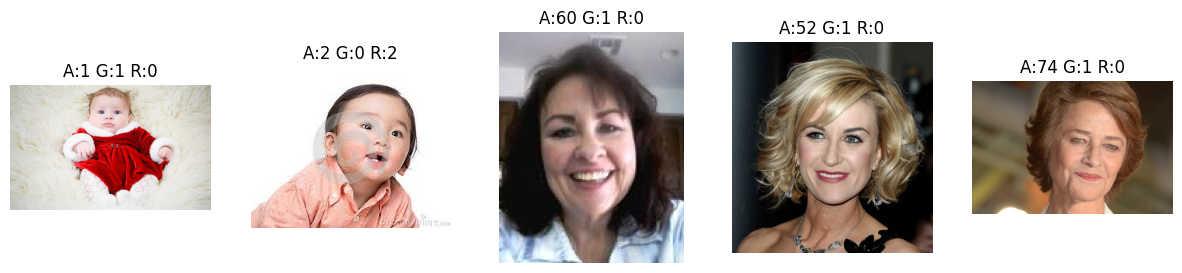

In [ ]:
# Call the function to display and save the first set of samples
show_sample(test_samples2,'test_samples2')